In [111]:
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler

In [112]:
nutrients=pd.read_csv("nutrition.csv")
nutrients.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [113]:
nutrients.describe()

,Unnamed: 0,calories,lucopene
count,8789.000000,8789.000000,8789.0
mean,4394.000000,226.283878,0.0
std,2537.310091,169.862001,0.0
min,0.000000,0.000000,0.0
25%,2197.000000,91.000000,0.0
50%,4394.000000,191.000000,0.0
75%,6591.000000,337.000000,0.0
max,8788.000000,902.000000,0.0


In [114]:
nutrients.dtypes


Unnamed: 0       int64
name            object
serving_size    object
calories         int64
total_fat       object
                 ...  
alcohol         object
ash             object
caffeine        object
theobromine     object
water           object
Length: 77, dtype: object

In [115]:
nutrients.drop(["Unnamed: 0"],axis=1,inplace=True)

In [116]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         8789 non-null   object
 1   serving_size                 8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

In [117]:
missing = nutrients.isnull().sum()
print(missing)

name                0
serving_size        0
calories            0
total_fat           0
saturated_fat    1590
                 ... 
alcohol             0
ash                 0
caffeine            0
theobromine         0
water               0
Length: 76, dtype: int64


In [118]:
nutrients=nutrients.dropna()
nutrients.shape

(7199, 76)

In [119]:
name = nutrients['name']
nutrients = nutrients.drop(columns=['name'])

# Remove alphabetical characters (but not numbers) from all columns
nutrients = nutrients.applymap(lambda x: pd.to_numeric(re.sub('[a-zA-Z]', '', str(x))))

# Add the 'name' column back and reorder columns
nutrients['name'] = name
nutrients = nutrients[['name'] + [col for col in nutrients.columns if col != 'name']]

nutrients.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
1,"Nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,0.0,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
3,"Teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,0.0,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,"Sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,0.0,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
5,"Cauliflower, raw",100,25,0.3,0.1,0,30.0,44.3,57.0,0.0,...,0.28,0.130,0.034,0.031,0.0,0.0,0.76,0.0,0.0,92.07
6,"Taro leaves, raw",100,42,0.7,0.2,0,3.0,12.8,126.0,0.0,...,0.74,0.151,0.060,0.307,0.0,0.0,1.92,0.0,0.0,85.66


In [120]:
nutrients = nutrients.rename(columns={
    'calories': 'calories_100g',
    'serving_size': 'serving_size_g',
    'total_free_saccharides': 'total_free_saccharides_g',
    'saturated_fatty_acids': 'saturated_fatty_acids_g',
    'monounsaturated_fatty_acids': 'monounsaturated_fatty_acids_g',
    'polyunsaturated_fatty_acids': 'polyunsaturated_fatty_acids_g',
    'fatty_acids_total_trans': 'fatty_acids_total_trans_g',
    'water': 'water_g',
    'carbohydrate': 'Carbohydrate_g'
})

In [121]:
nutrients.interpolate(inplace=True)

In [122]:
nutrients.head()

,name,serving_size_g,calories_100g,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_g,alcohol,ash,caffeine,theobromine,water_g
1,"Nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,0.0,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
3,"Teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,0.0,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,"Sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,0.0,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
5,"Cauliflower, raw",100,25,0.3,0.1,0,30.0,44.3,57.0,0.0,...,0.28,0.130,0.034,0.031,0.0,0.0,0.76,0.0,0.0,92.07
6,"Taro leaves, raw",100,42,0.7,0.2,0,3.0,12.8,126.0,0.0,...,0.74,0.151,0.060,0.307,0.0,0.0,1.92,0.0,0.0,85.66


In [123]:
nutrients['calories_100g'].max()


902

In [124]:
nutrients.rename(columns={
    'calories': 'calories_100g',
    'serving_size': 'serving_size_g',
    'total_free_saccharides': 'total_free_saccharides_g',
    'saturated_fatty_acids': 'saturated_fatty_acids_g',
    'monounsaturated_fatty_acids': 'monounsaturated_fatty_acids_g',
    'polyunsaturated_fatty_acids': 'polyunsaturated_fatty_acids_g',
    'fatty_acids_total_trans': 'fatty_acids_total_trans_g',
    'water': 'water_g',
    'carbohydrate': 'Carbohydrate_g'
},inplace=True)


In [150]:
columns = [ 'calories_100g', 'total_fat', 'saturated_fat',
       'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin',
       'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
       'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'Carbohydrate_g', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g',
       'polyunsaturated_fatty_acids_g', 'fatty_acids_total_trans_g', 'alcohol',
       'ash', 'caffeine', 'theobromine', 'water_g']

In [126]:
nutrients.to_excel("Nutrients.xlsx")

In [127]:
# Extracting only the numerical columns for normalization
norma_columns = ['calories_100g', 'total_fat', 'saturated_fat',
       'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin',
       'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
       'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'Carbohydrate_g', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g',
       'polyunsaturated_fatty_acids_g', 'fatty_acids_total_trans_g', 'alcohol',
       'ash', 'caffeine', 'theobromine', 'water_g']

scaler = MinMaxScaler()

# Normalizing the numerical columns in the DataFrame
nutrients[norma_columns] = scaler.fit_transform(nutrients[norma_columns])
nutrients



,name,serving_size_g,calories_100g,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_g,alcohol,ash,caffeine,theobromine,water_g
1,"Nuts, pecans",100,0.765033,0.719720,0.063608,0.000000,0.000000,0.016852,0.009402,0.0,...,0.719476,0.064155,0.487531,0.289643,0.000000,0.0,0.025126,0.0,0.0,0.035816
3,"Teff, uncooked",100,0.404232,0.023023,0.003128,0.000000,0.000462,0.005451,0.000000,0.0,...,0.023018,0.004176,0.007038,0.014352,0.000000,0.0,0.039966,0.0,0.0,0.089744
4,"Sherbet, orange",100,0.155902,0.019019,0.011470,0.000323,0.001769,0.003204,0.001709,0.0,...,0.019215,0.011617,0.006333,0.001072,0.000323,0.0,0.006745,0.0,0.0,0.672568
5,"Cauliflower, raw",100,0.023385,0.002002,0.000000,0.000000,0.001154,0.018433,0.024359,0.0,...,0.002002,0.000837,0.000406,0.000415,0.000000,0.0,0.012816,0.0,0.0,0.936813
6,"Taro leaves, raw",100,0.042316,0.006006,0.001043,0.000000,0.000115,0.005326,0.053846,0.0,...,0.006605,0.001057,0.000717,0.004114,0.000000,0.0,0.032378,0.0,0.0,0.871591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,0.134744,0.034034,0.013556,0.020000,0.002077,0.026838,0.001709,0.0,...,0.034227,0.013637,0.018569,0.003270,0.020000,0.0,0.018718,0.0,0.0,0.737790
8785,"Lamb, cooked, separable lean only, composite o...",100,0.224944,0.088088,0.039625,0.035161,0.001923,0.000000,0.000000,0.0,...,0.087870,0.039874,0.041583,0.006968,0.035161,0.0,0.026981,0.0,0.0,0.609992
8786,"Lamb, raw, separable lean and fat, composite o...",100,0.304009,0.229229,0.124088,0.025161,0.001500,0.000000,0.000427,0.0,...,0.226781,0.120565,0.104195,0.013133,0.025161,0.0,0.015514,0.0,0.0,0.608466
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,0.130290,0.029029,0.010428,0.019355,0.002038,0.026713,0.001709,0.0,...,0.029624,0.010842,0.015127,0.003122,0.019355,0.0,0.018550,0.0,0.0,0.747151


Removed 'serving_size_g'  as there is only one unique value in this attribute

In [128]:
nutrients.drop(["serving_size_g"],axis=1,inplace=True)

In [129]:
nutrients.to_excel('nutrients.xlsx')

# Part 2

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [131]:
nutrients.shape

(7199, 75)

In [132]:
nutrients['vitamin_c'].value_counts()

0.000000    4407
0.000053     159
0.000105     146
0.000158     113
0.000526     107
            ... 
0.039368       1
0.028474       1
0.011895       1
0.042526       1
0.008263       1
Name: vitamin_c, Length: 426, dtype: int64

In [133]:
nutrients.describe()

,calories_100g,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,fat,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_g,alcohol,ash,caffeine,theobromine,water_g
count,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,...,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000
mean,0.280594,0.125378,0.042678,0.015124,0.012447,0.011570,0.021157,0.012797,0.043307,0.015928,...,0.125485,0.043329,0.054879,0.034390,0.015124,0.000431,0.030256,0.000523,0.002127,0.500115
std,0.185169,0.165276,0.071710,0.041312,0.028579,0.023130,0.056107,0.064593,0.050835,0.038559,...,0.165209,0.071951,0.087083,0.073373,0.041312,0.017648,0.036598,0.016037,0.025515,0.301240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.140312,0.027027,0.006257,0.000000,0.002115,0.000000,0.001282,0.000000,0.007928,0.000000,...,0.027422,0.006913,0.007803,0.004570,0.000000,0.000000,0.015683,0.000000,0.000000,0.138889
50%,0.241648,0.073073,0.021898,0.003871,0.004423,0.002039,0.003846,0.000000,0.035112,0.010377,...,0.073659,0.022501,0.028869,0.011498,0.003871,0.000000,0.021248,0.000000,0.000000,0.603378
75%,0.397550,0.159159,0.051095,0.023226,0.017308,0.018703,0.018376,0.000000,0.061209,0.019710,...,0.161279,0.052224,0.067392,0.032202,0.023226,0.000000,0.037099,0.000000,0.000000,0.735806
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


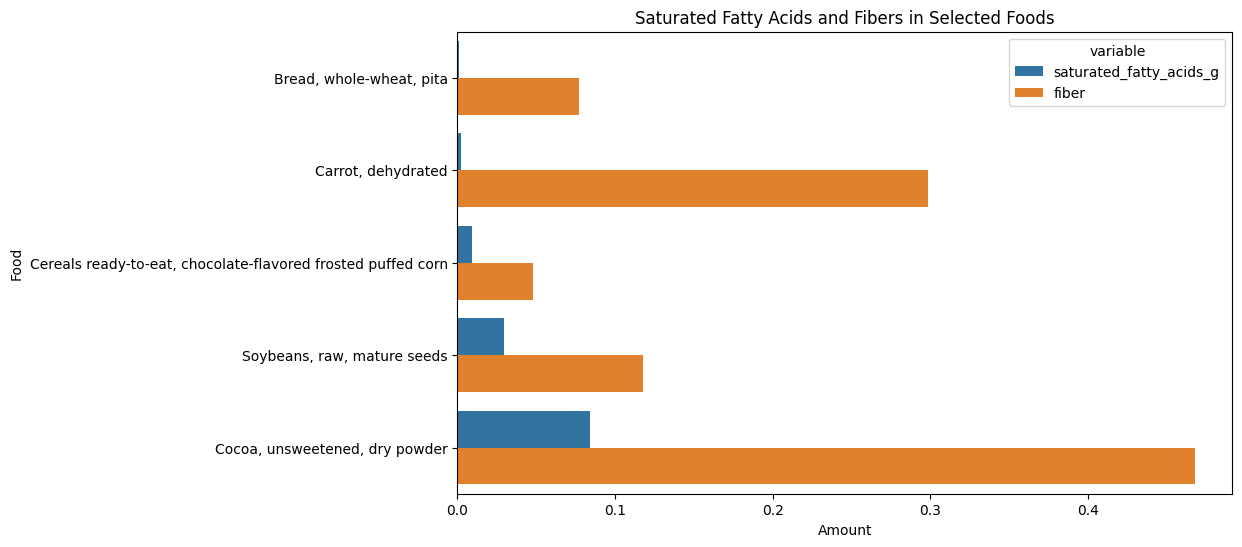

In [134]:
plt_bt_carbs = nutrients[['name', 'saturated_fatty_acids_g', 'fiber']]

selected_names = ['Bread, whole-wheat, pita', 'Apples, with skin, red delicious, raw',
                  'Cereals ready-to-eat, chocolate-flavored frosted puffed corn', 'Cocoa, unsweetened, dry powder',
                  'Soybeans, raw, mature seeds', 'Carrot, dehydrated']
plt_bt_carbs = plt_bt_carbs[plt_bt_carbs['name'].isin(selected_names)]

plt_bt_carbs = plt_bt_carbs.sort_values(by='saturated_fatty_acids_g')

plt_bt_carbs = plt_bt_carbs.rename(columns={'name': 'Food'})

plt_bt_carbs_long = pd.melt(plt_bt_carbs, id_vars=['Food'])

plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='Food', hue='variable', data=plt_bt_carbs_long)
plt.xlabel('Amount')
plt.ylabel('Food')
plt.title('Saturated Fatty Acids and Fibers in Selected Foods')
plt.show()

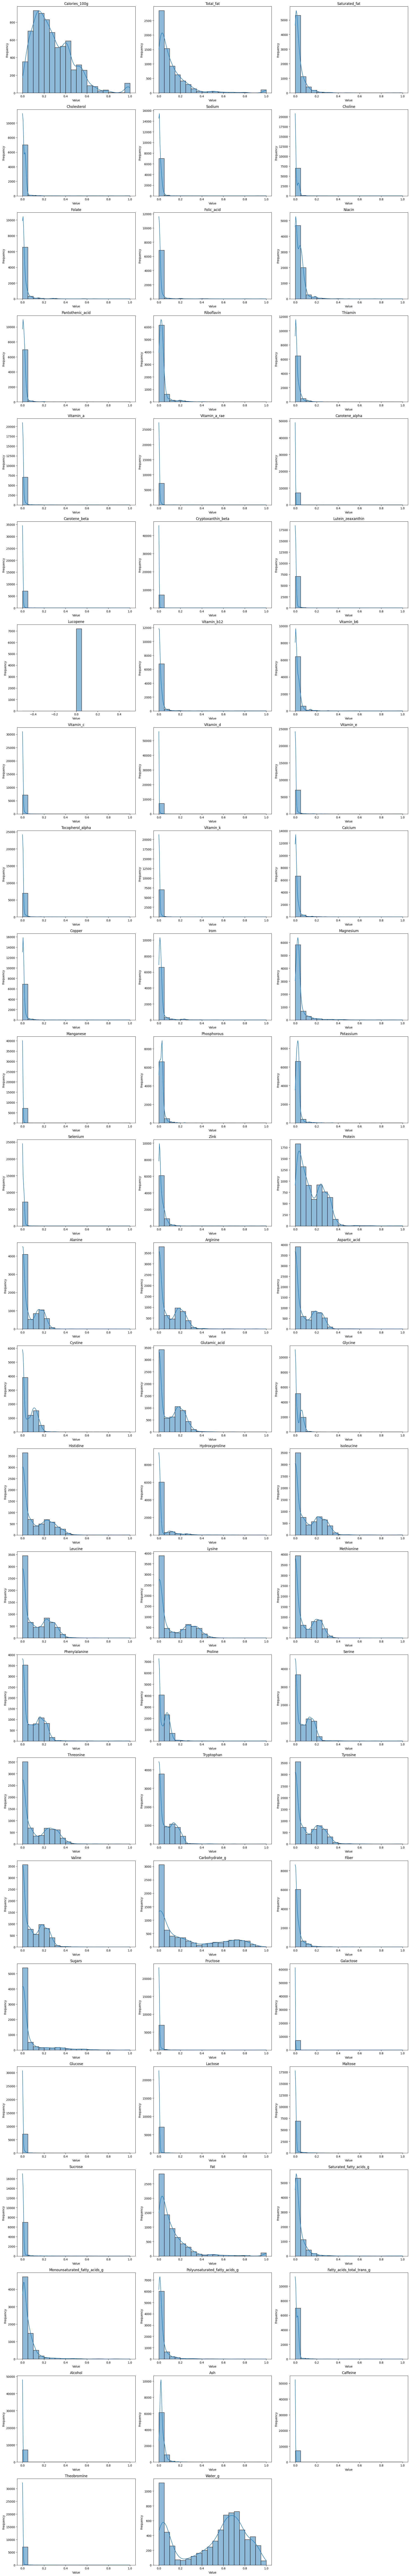

In [159]:
num_features = len(columns)
num_rows = (num_features + 2) // 3  # Adding 2 to round up to the nearest multiple of 3
num_cols = min(3, num_features)

plt.figure(figsize=(20, 5 * num_rows))
for i, feature in enumerate(columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(nutrients[feature], kde=True, bins=20)
    plt.title(feature.capitalize())
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

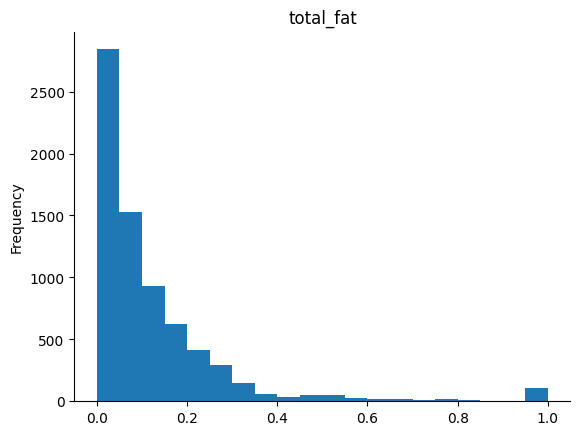

In [135]:
from matplotlib import pyplot as plt
nutrients['total_fat'].plot(kind='hist', bins=20, title='total_fat')
plt.gca().spines[['top', 'right',]].set_visible(False)

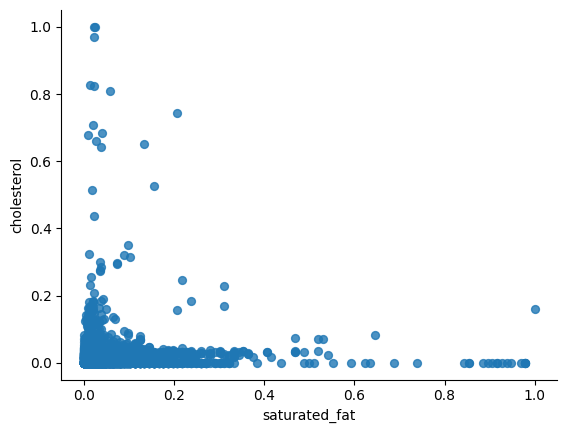

In [136]:
nutrients.plot(kind='scatter', x='saturated_fat', y='cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

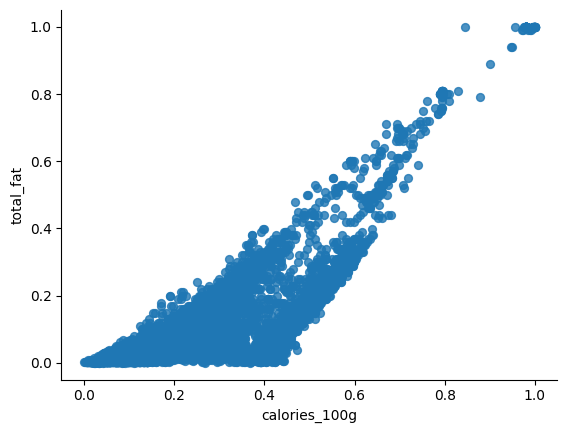

In [137]:
nutrients.plot(kind='scatter', x='calories_100g', y='total_fat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

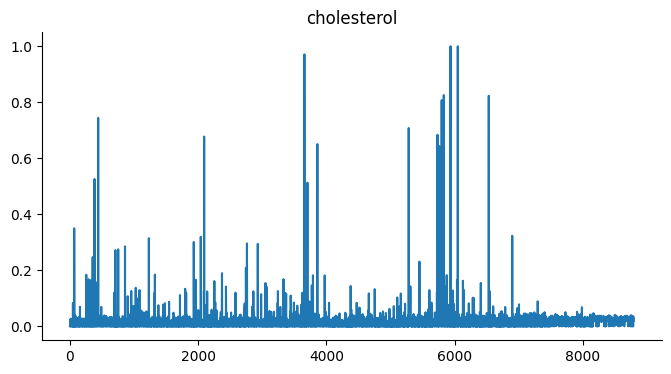

In [138]:
nutrients['cholesterol'].plot(kind='line', figsize=(8, 4), title='cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-146-cb77e1d0b550>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



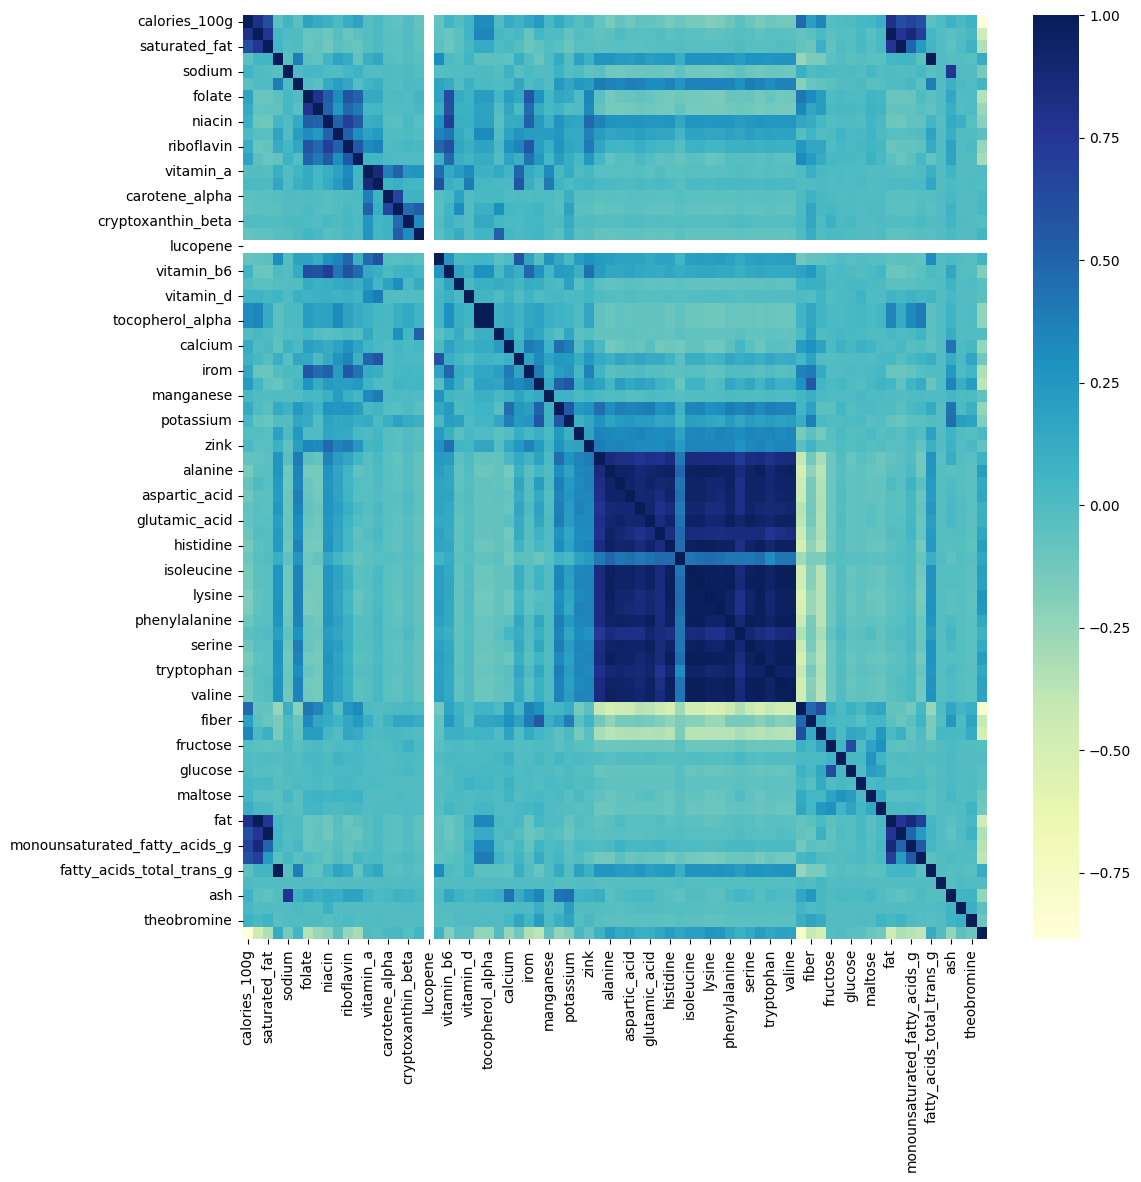

In [146]:
plt.figure(figsize=(12,12))
sns.heatmap(nutrients.corr(),cmap="YlGnBu")
plt.show()

#Part 3

In [139]:
import plotly.express as px

In [140]:
dataset = pd.read_csv('train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:

xd = px.parallel_coordinates(dataset,dimensions= ["Pclass","Age","SibSp","Parch","Fare"], color= "Survived")
xd.show()

In [142]:
flg = px.parallel_categories(dataset)

In [143]:
flg.show()